# <center>TSA4</center>
### <div align='right'>Made by Ihor Markevych.</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as tsa
import statsmodels.tsa.stattools as stattools
import statsmodels.tsa.vector_ar.vecm as vecm

## Problem 1

### Read in the series 'A.csv', 'B.csv', 'C.csv'

In [2]:
A = pd.read_csv('./A.csv', index_col=0)
B = pd.read_csv('./B.csv', index_col=0)
C = pd.read_csv('./C.csv', index_col=0)

#### Plot the data and observe

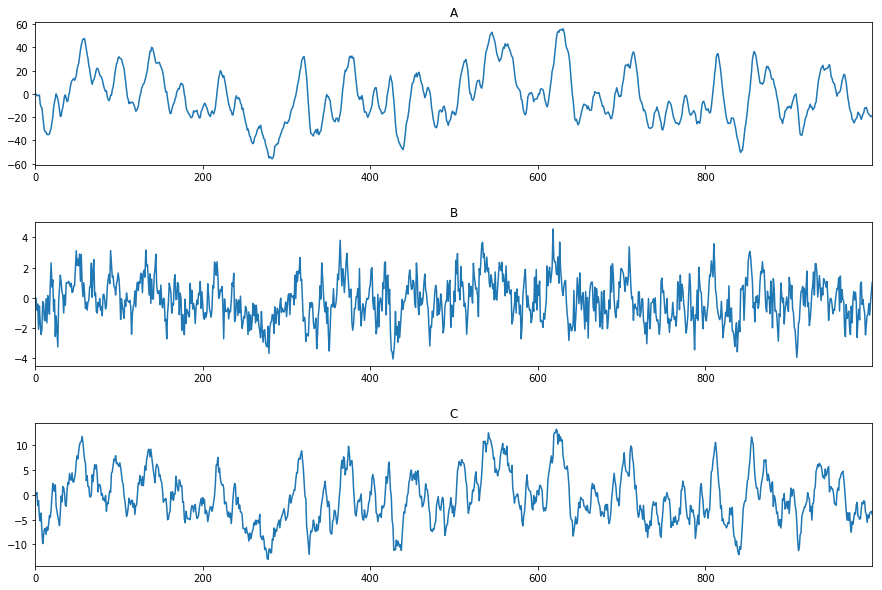

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
plt.subplots_adjust(hspace = 0.4)

A.plot(ax = axes[0], subplots=True, legend=False)
axes[0].title.set_text('A')
B.plot(ax = axes[1], subplots=True, legend=False)
axes[1].title.set_text('B')
C.plot(ax = axes[2], subplots=True, legend=False)
axes[2].title.set_text('C')
plt.show()

We can assume some kind of connection between those series from the plots.

#### DataFrame the series

In [4]:
data = pd.DataFrame({'A': A.iloc[:, 0], 'B': B.iloc[:, 0], 'C': C.iloc[:, 0]})
data

,A,B,C
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,-1.690123,-0.809757,0.420383
3,-1.219096,-0.412396,-2.200924
4,-1.410304,-2.072510,-1.201323
...,...,...,...
995,-17.606319,-0.376287,-4.681310
996,-18.148384,-1.141380,-3.754667
997,-19.441957,-0.247277,-3.524234
998,-18.939188,0.408352,-3.379407


### Create a VAR model

In [5]:
model = tsa.VAR(data)

### Determine optimum lag order (p):

#### Lag order selection

In [6]:
maxLags = 15

lagOrder = model.select_order(maxLags)
lagOrder.summary()

,AIC,BIC,FPE,HQIC
0,8.543,8.558,5131.,8.549
1,0.2952,0.3548,1.343,0.3179
2,0.02932*,0.1336*,1.030*,0.06900*
3,0.03951,0.1885,1.040,0.09619
4,0.04831,0.2420,1.049,0.1220
5,0.05904,0.2975,1.061,0.1497
6,0.07068,0.3538,1.073,0.1784
7,0.08682,0.4147,1.091,0.2115
8,0.09559,0.4681,1.100,0.2373
9,0.09996,0.5172,1.105,0.2587


#### Perform model fits at different lag orders to find lowest AIC

In [7]:
minAic = float('inf')
bestK = float('nan')
for k in range(maxLags + 1):
    modelFit = model.fit(k)
    if modelFit.aic < minAic:
        minAic = modelFit.aic
        bestK = k

print(f'Best lag order found is {bestK} with AIC score of {minAic}.')

Best lag order found is 2 with AIC score of 0.047499377899616876.


Both options, despite slightly different AIC give us **optimum lag order of $2$**.

Below is a comparison of AIC scores of those two different approaches for $lag = 1, 15$.

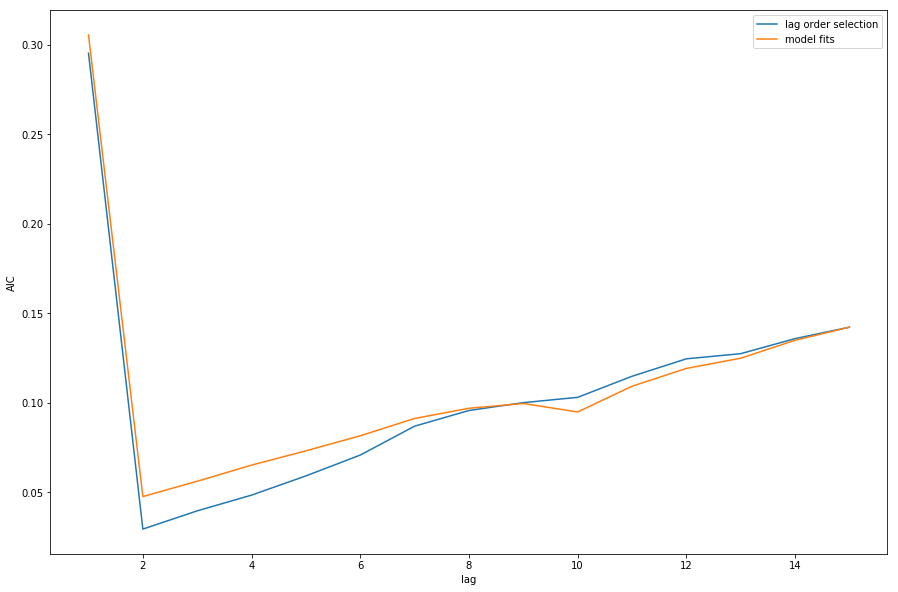

In [8]:
plt.figure(figsize=(15, 10))
plt.plot([i for i in range(1, maxLags + 1)], 
         lagOrder.ics['aic'][1:], 
         label='lag order selection')

plt.plot([i for i in range(1, maxLags + 1)], 
         [model.fit(k).aic for k in range(1, maxLags + 1)], 
         label='model fits')

plt.xlabel('lag')
plt.ylabel('AIC')

plt.legend()
plt.show()

### Model fit at optimum lag order and get results

In [9]:
modelFit = model.fit(2)
modelFit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 26, Mar, 2020
Time:                     11:01:29
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.150727
Nobs:                     998.000    HQIC:                 0.0867368
Log likelihood:          -4251.00    FPE:                    1.04865
AIC:                    0.0474994    Det(Omega_mle):         1.02689
--------------------------------------------------------------------
Results for equation A
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.021805         0.032702           -0.667           0.505
L1.A          0.506941         0.029924           16.941           0.000
L1.B          0.019381         0.032257            0.601           0.548
L1.C          1.036461 

### Use results to find roots (number of roots = K*p)

In [10]:
modelFit.roots

array([-5.0383561 -0.j        , -2.75979754+0.95145539j,
       -2.75979754-0.95145539j,  1.29510203+0.24455938j,
        1.29510203-0.24455938j,  1.1440892 -0.j        ])

## Observe the roots:

Absolute values of roots:

In [11]:
np.abs(modelFit.roots)

array([5.0383561 , 2.91920363, 2.91920363, 1.31799035, 1.31799035,
       1.1440892 ])

All values are > 1 => stationary.

### Investigate Granger causality between series combinations (if any)

**Null hypothesis**: The time series in the 2nd column of data DOES NOT Granger cause the time series in the 1st column.

First argument is "The data for test whether the time series in the second column Granger causes the time series in the first column."  
Reject the null hypothesis if p ≤ 0.05.

##### B -> A

In [12]:
stattools.grangercausalitytests(data.loc[:, ['A', 'B']], 3)
print()


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=392.7695, p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=393.9525, p=0.0000  , df=1
likelihood ratio test: chi2=332.0937, p=0.0000  , df=1
parameter F test:         F=392.7695, p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=322.8985, p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=649.0487, p=0.0000  , df=2
likelihood ratio test: chi2=499.9850, p=0.0000  , df=2
parameter F test:         F=322.8985, p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=362.6217, p=0.0000  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=1095.5571, p=0.0000  , df=3
likelihood ratio test: chi2=739.1671, p=0.0000  , df=3
parameter F test:         F=362.6217, p=0.0000  , df_denom=990, df_num=3



##### A -> B

In [13]:
stattools.grangercausalitytests(data.loc[:, ['B', 'A']], 3)
print()


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0198  , p=0.0826  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=3.0289  , p=0.0818  , df=1
likelihood ratio test: chi2=3.0243  , p=0.0820  , df=1
parameter F test:         F=3.0198  , p=0.0826  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1399  , p=0.8694  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=0.2813  , p=0.8688  , df=2
likelihood ratio test: chi2=0.2812  , p=0.8688  , df=2
parameter F test:         F=0.1399  , p=0.8694  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4656  , p=0.2224  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=4.4277  , p=0.2188  , df=3
likelihood ratio test: chi2=4.4179  , p=0.2197  , df=3
parameter F test:         F=1.4656  , p=0.2224  , df_denom=990, df_num=3



##### C -> A

In [14]:
stattools.grangercausalitytests(data.loc[:, ['A', 'C']], 3)
print()


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10057.5224, p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=10087.8161, p=0.0000  , df=1
likelihood ratio test: chi2=2404.3504, p=0.0000  , df=1
parameter F test:         F=10057.5224, p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2195.0923, p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=4412.2903, p=0.0000  , df=2
likelihood ratio test: chi2=1686.9242, p=0.0000  , df=2
parameter F test:         F=2195.0923, p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1409.5274, p=0.0000  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=4258.4812, p=0.0000  , df=3
likelihood ratio test: chi2=1657.2892, p=0.0000  , df=3
parameter F test:         F=1409.5274, p=0.0000  , df_denom=990, df_num=3



##### A -> C

In [15]:
stattools.grangercausalitytests(data.loc[:, ['C', 'A']], 3)
print()


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=51.5885 , p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=51.7439 , p=0.0000  , df=1
likelihood ratio test: chi2=50.4484 , p=0.0000  , df=1
parameter F test:         F=51.5885 , p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=15.3064 , p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=30.7669 , p=0.0000  , df=2
likelihood ratio test: chi2=30.3021 , p=0.0000  , df=2
parameter F test:         F=15.3064 , p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4617  , p=0.7091  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=1.3948  , p=0.7067  , df=3
likelihood ratio test: chi2=1.3939  , p=0.7070  , df=3
parameter F test:         F=0.4617  , p=0.7091  , df_denom=990, df_num=3



##### C -> B

In [16]:
stattools.grangercausalitytests(data.loc[:, ['B', 'C']], 3)
print()


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.3795 , p=0.0001  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=16.4288 , p=0.0001  , df=1
likelihood ratio test: chi2=16.2952 , p=0.0001  , df=1
parameter F test:         F=16.3795 , p=0.0001  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1996  , p=0.3018  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=2.4112  , p=0.2995  , df=2
likelihood ratio test: chi2=2.4083  , p=0.2999  , df=2
parameter F test:         F=1.1996  , p=0.3018  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0361  , p=0.3757  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=3.1304  , p=0.3720  , df=3
likelihood ratio test: chi2=3.1255  , p=0.3727  , df=3
parameter F test:         F=1.0361  , p=0.3757  , df_denom=990, df_num=3



##### B  -> C

In [17]:
stattools.grangercausalitytests(data.loc[:, ['C', 'B']], 3)
print()


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1396.3028, p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=1400.5085, p=0.0000  , df=1
likelihood ratio test: chi2=875.3882, p=0.0000  , df=1
parameter F test:         F=1396.3028, p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=830.6571, p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=1669.6793, p=0.0000  , df=2
likelihood ratio test: chi2=981.2445, p=0.0000  , df=2
parameter F test:         F=830.6571, p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=511.7365, p=0.0000  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=1546.0646, p=0.0000  , df=3
likelihood ratio test: chi2=933.5653, p=0.0000  , df=3
parameter F test:         F=511.7365, p=0.0000  , df_denom=990, df_num=3



Granger casuality:
* B -> A,
* C -> A,
* B -> C.

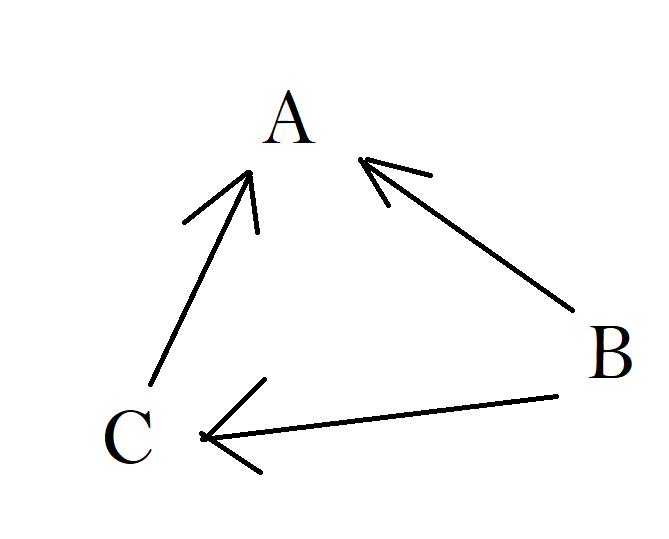

### Use IRF plots to confirm your causality conclusions

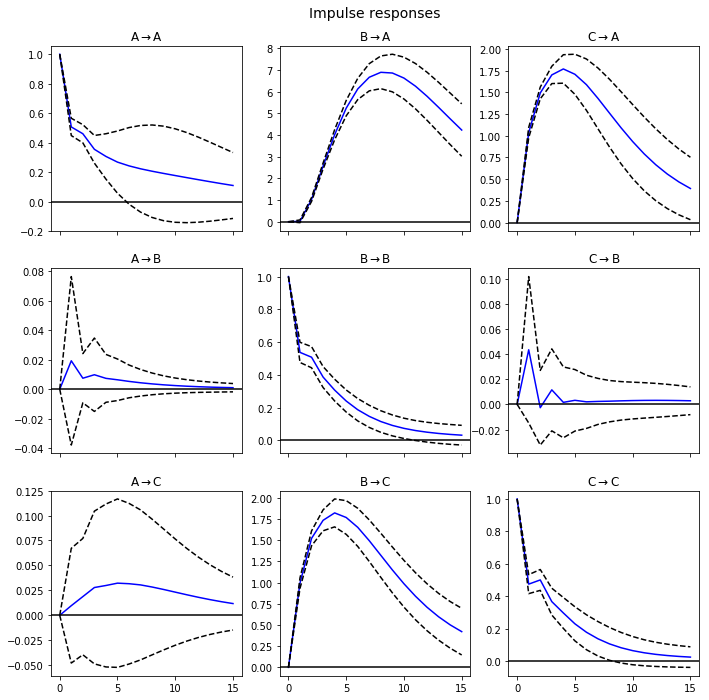

In [18]:
irfs = modelFit.irf(15)
irfs.plot()
plt.show()

Our conclusions from tests are confirmed by IRF plots (The zero line lies outside the 95% confidence interval - reject the null hypothesis). 

### Order the variables (list series in decreasing order of exogeneity):

1. B;
1. C;
1. A;

### Perform a dynamic forecast 10 steps forward and plot

In [19]:
modelFit.forecast(data.values[-2:], 10)

array([[-1.94104641e+01,  5.03963569e-01, -1.36313418e+00],
       [-1.69942919e+01,  5.03033660e-01, -4.43397126e-01],
       [-1.34996894e+01,  3.19501467e-01,  3.24082263e-01],
       [-1.00331316e+01,  2.28675337e-01,  7.20005734e-01],
       [-6.82304793e+00,  1.34922583e-01,  8.92680897e-01],
       [-4.15819446e+00,  6.63481920e-02,  9.19410233e-01],
       [-2.07581668e+00,  1.21459016e-02,  8.47997580e-01],
       [-5.65396328e-01, -2.85649275e-02,  7.24565568e-01],
       [ 4.41898862e-01, -5.86457875e-02,  5.75673601e-01],
       [ 1.03234165e+00, -8.05158007e-02,  4.21448139e-01]])

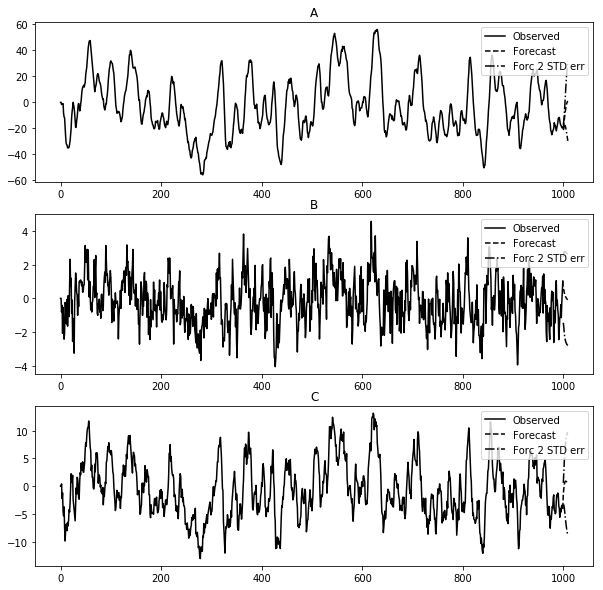

In [20]:
modelFit.plot_forecast(10)
plt.show()

C:\Users\Dergel\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


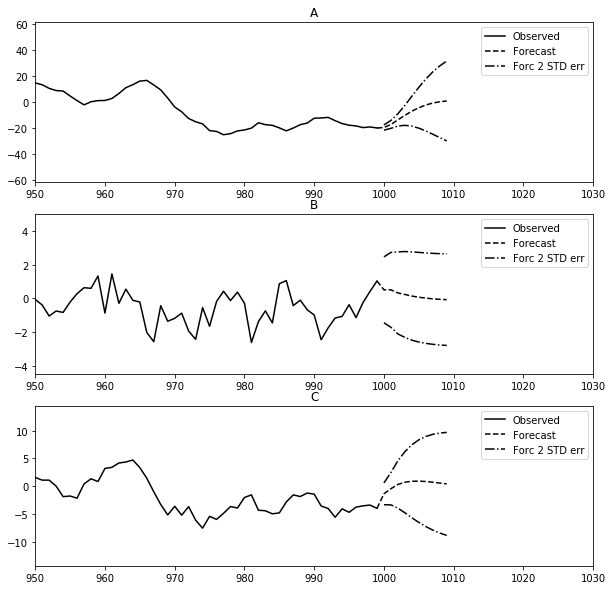

In [21]:
modelFit.plot_forecast(10)
plt.subplot(311).set_xlim(950, 1030)
plt.subplot(312).set_xlim(950, 1030)
plt.subplot(313).set_xlim(950, 1030)
plt.show()

-------------------------
-------------------------
-------------------------

## Problem 2

### Read in the series 'X.csv', 'Y.csv', 'Z.csv'

In [22]:
X = pd.read_csv('./X.csv', index_col=0)
Y = pd.read_csv('./Y.csv', index_col=0)
Z = pd.read_csv('./Z.csv', index_col=0)

#### Plot the data and observe

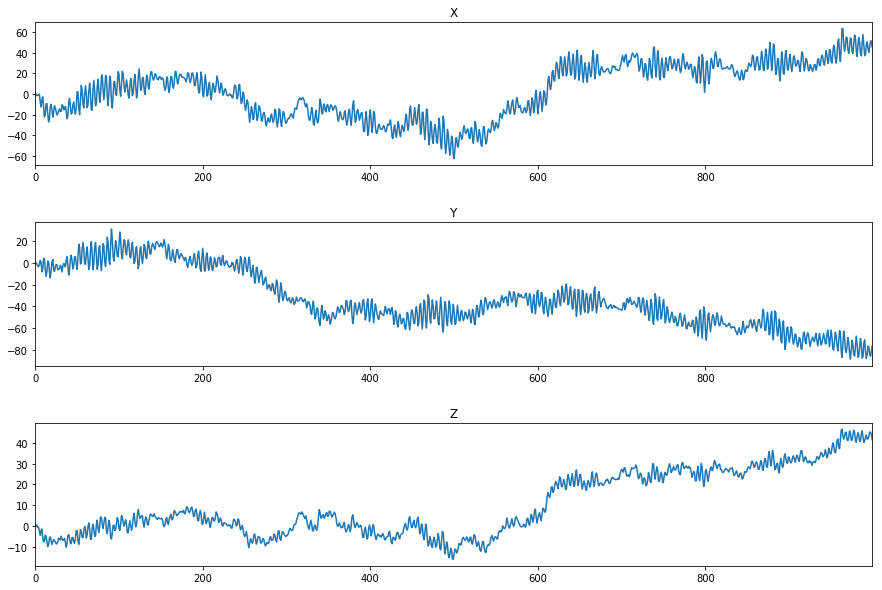

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
plt.subplots_adjust(hspace = 0.4)

X.plot(ax = axes[0], subplots=True, legend=False)
axes[0].title.set_text('X')
Y.plot(ax = axes[1], subplots=True, legend=False)
axes[1].title.set_text('Y')
Z.plot(ax = axes[2], subplots=True, legend=False)
axes[2].title.set_text('Z')
plt.show()

We can assume some kind of connection between those series from the plots.

#### DataFrame the series

In [24]:
data2 = pd.DataFrame({'X': X.iloc[:, 0], 'Y': Y.iloc[:, 0], 'Z': Z.iloc[:, 0]})
data2

,X,Y,Z
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,-1.690123,-0.809757,0.420383
3,-1.298689,-2.972061,-0.759944
4,-0.980425,-3.376950,-0.643369
...,...,...,...
995,40.531182,-77.085474,43.112318
996,45.694842,-84.004080,45.016507
997,51.539795,-85.793806,45.210512
998,51.498315,-81.325597,43.883088


### Create a VAR model

In [25]:
model2 = tsa.VAR(data2)

### Determine optimum lag order (p):

#### Lag order selection

In [26]:
maxLags = 15

lagOrder = model2.select_order(maxLags)
lagOrder.summary()

,AIC,BIC,FPE,HQIC
0,15.65,15.66,6.259e+06,15.66
1,3.532,3.591,34.18,3.554
2,0.02254*,0.1268*,1.023*,0.06221*
3,0.03348,0.1825,1.034,0.09016
4,0.04409,0.2378,1.045,0.1178
5,0.05314,0.2916,1.055,0.1438
6,0.06478,0.3479,1.067,0.1725
7,0.07594,0.4038,1.079,0.2006
8,0.09108,0.4636,1.095,0.2328
9,0.1015,0.5187,1.107,0.2602


#### Perform model fits at different lag orders to find lowest AIC

In [27]:
minAic = float('inf')
bestK = float('nan')
for k in range(maxLags + 1):
    modelFit = model2.fit(k)
    if modelFit.aic < minAic:
        minAic = modelFit.aic
        bestK = k

print(f'Best lag order found is {bestK} with AIC score of {minAic}.')

Best lag order found is 2 with AIC score of 0.04017617534228373.


Both options, despite slightly different AIC give us **optimum lag order of $2$**.

### Model fit at optimum lag order and get results

In [28]:
modelFit2 = model2.fit(2)
modelFit2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 26, Mar, 2020
Time:                     11:01:32
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.143403
Nobs:                     998.000    HQIC:                 0.0794136
Log likelihood:          -4247.35    FPE:                    1.04099
AIC:                    0.0401762    Det(Omega_mle):         1.01939
--------------------------------------------------------------------
Results for equation X
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.068742         0.053248           -1.291           0.197
L1.X          0.703151         0.008206           85.692           0.000
L1.Y          0.224385         0.029645            7.569           0.000
L1.Z          2.023227 

### Use results to find roots (number of roots = K*p)

In [29]:
modelFit2.roots

array([21.58429119-0.j        ,  2.29582779-0.j        ,
        0.28859758+0.98862628j,  0.28859758-0.98862628j,
        1.00429657-0.j        ,  0.99930527-0.j        ])

## Observe the roots:

Absolute values of roots:

In [30]:
np.abs(modelFit2.roots)

array([21.58429119,  2.29582779,  1.02988858,  1.02988858,  1.00429657,
        0.99930527])

One root is < 1 => NOT stationary, cointegrated.

### Perform a Johansen cointegration test. What is the cointegration rank?


In [31]:
rankTest = vecm.select_coint_rank(data2, -1, 2)
print(rankTest)
print(f'Cointegration rank = {rankTest.rank}.')

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          452.3          24.28
  1   3          5.069          12.32
-------------------------------------
Cointegration rank = 1.


### Create a VECM model (with no deterministic terms) and fit

In [32]:
modelVECM = vecm.VECM(data2, 
                      k_ar_diff=lagOrder.aic, 
                      coint_rank=rankTest.rank)

modelVECMFit = modelVECM.fit()

modelVECMFit.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.X,0.5711,0.036,15.770,0.000,0.500,0.642
L1.Y,-0.2101,0.031,-6.776,0.000,-0.271,-0.149
L1.Z,0.2840,0.098,2.894,0.004,0.092,0.476
L2.X,0.0318,0.034,0.937,0.349,-0.035,0.098
L2.Y,0.0012,0.020,0.062,0.950,-0.038,0.040
L2.Z,-0.1416,0.079,-1.797,0.072,-0.296,0.013
,coef,std err,z,P>|z|,[0.025,0.975]
L1.X,0.3619,0.035,10.236,0.000,0.293,0.431
L1.Y,0.2097,0.030,6.926,0.000,0.150,0.269
L1.Z,-0.5298,0.096,-5.529,0.000,-0.718,-0.342


### What are the a and b matrices?


$\alpha$:

In [33]:
modelVECMFit.alpha

array([[-0.8702748 ],
       [ 0.56087864],
       [-0.2055741 ]])

$\beta$:

In [34]:
modelVECMFit.beta

array([[ 1.        ],
       [-0.49959688],
       [-2.00084199]])

### Whether VAR or VECM model, perform a dynamic forecast 10 steps forward and plot

In [35]:
modelVECMFit.predict(10)

array([[ 39.96913017, -75.88444219,  42.34106421],
       [ 43.17137417, -81.90848392,  43.9478726 ],
       [ 49.78342112, -85.24401553,  44.02248256],
       [ 50.41572982, -81.33746166,  42.5153868 ],
       [ 44.5149608 , -75.99726314,  41.62313141],
       [ 40.70282345, -76.76418593,  42.56608318],
       [ 44.22084518, -82.23903466,  43.92954698],
       [ 49.76477953, -84.50277993,  43.78205946],
       [ 49.46387575, -80.54730727,  42.40878379],
       [ 44.04298534, -76.23540929,  41.79750588]])

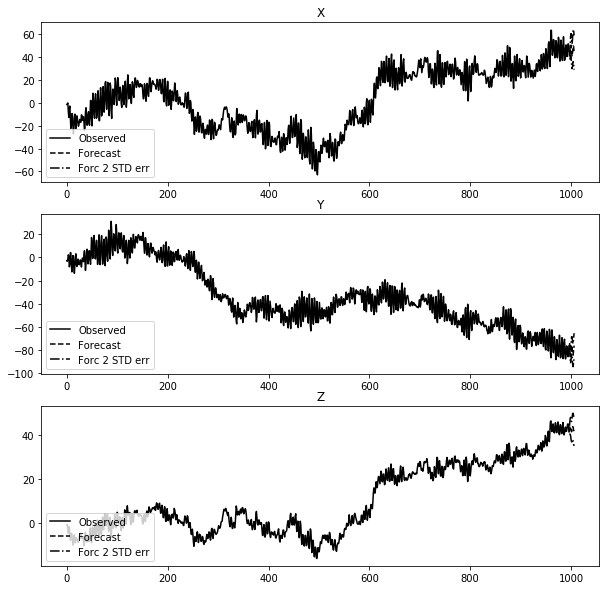

In [36]:
modelVECMFit.plot_forecast(10)
plt.show()

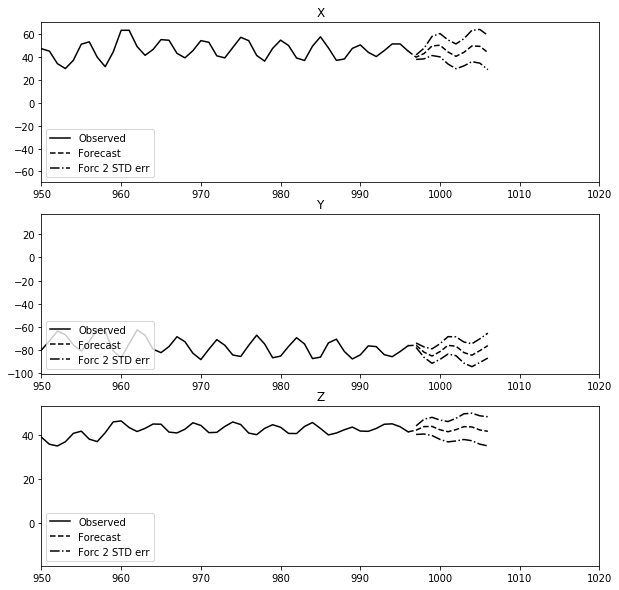

In [37]:
modelVECMFit.plot_forecast(10)
plt.subplot(311).set_xlim(950, 1020)
plt.subplot(312).set_xlim(950, 1020)
plt.subplot(313).set_xlim(950, 1020)
plt.show()